In [22]:
from pymongo import MongoClient
import pprint
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

db=MongoClient()["comic"]

# 요일별 웹툰 
좋아요평균

In [23]:
webtoons=db["webtoons"]

pipeline=[
    {
        '$unwind': {
            'path': '$dayrank'
        }
    }, {
        '$group': {
            '_id': '$dayrank.day', 
            'totalLike': {
                '$sum': '$likeIt'
            }, 
            'totalWebtoons': {
                '$sum': 1
            }
        }
    }, {
        '$set': {
            'weekday': '$_id', 
            'avgLike': {
                '$divide': [
                    '$totalLike', '$totalWebtoons'
                ]
            }
        }
    }, {
        '$project': {
            'weekday': 1, 
            'avgLike': 1, 
            '_id': 0
        }
    }
]

plist = list(webtoons.aggregate(pipeline))

df=pd.DataFrame(plist)
df

,weekday,avgLike
0,thu,173260.255319
1,sat,155627.562500
2,tue,185206.500000
3,mon,176405.450980
4,fri,180965.958333
5,wed,169281.549020
6,sun,111100.857143


In [24]:
df=df.reindex([5,0,6,4,2,3,1]) # 아니 이거 실행할때마다 순서 바뀌는데 value정보로 정렬못하나??
df

,weekday,avgLike
5,wed,169281.549020
0,thu,173260.255319
6,sun,111100.857143
4,fri,180965.958333
2,tue,185206.500000
3,mon,176405.450980
1,sat,155627.562500


<BarContainer object of 7 artists>

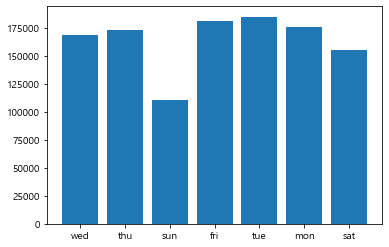

In [25]:
fig, ax = plt.subplots()

ax.bar(list(df.weekday), list(df.avgLike))

# 주 2회 연재 만화 보기

In [26]:
pipeline=[
    {
        '$match': {
            '$expr': {
                '$gt': [
                    {
                        '$size': '$dayrank'
                    }, 1
                ]
            }
        }
    }, {
        '$set': {
            'day': '$dayrank.day'
        }
    }, {
        '$project': {
            'title': 1, 
            'day': 1, 
            '_id': 0
        }
    }
]

plist=list(webtoons.aggregate(pipeline))

df=pd.DataFrame(plist)
df

,title,day
0,모죠의 일지,"[wed, sat]"
1,유미의 세포들,"[wed, sat]"
2,데이빗,"[thu, sun]"
3,닥터앤닥터 육아일기,"[wed, sun]"
4,사소한 냐냐,"[mon, thu]"
5,패밀리 사이즈,"[tue, sun]"
6,윌유메리미,"[tue, sat]"
7,삼국지톡,"[tue, fri]"
